In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


# **Python Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import *
from sklearn.pipeline import *
from sklearn.impute import *
from sklearn.preprocessing import *
from sklearn.feature_extraction.text import *
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.tree import *
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import *

In [3]:
df=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")

In [4]:
df.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


# **Train Test Data Split**

In [5]:
X_train=df.drop("Rating",axis=1)
y_train=df["Rating"]
X_test=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")

In [6]:
type(X_train)

pandas.core.frame.DataFrame

# Shape of datasets

In [7]:
X_train.shape,y_train.shape,X_test.shape

((13636, 14), (13636,), (4546, 14))

#  ** **Exploratory data analysis**

In [8]:
X_train.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'BestScore', 'Recipe_Review'],
      dtype='object')

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  BestScore          13636 non-null  int64 
 13  Recipe_Review      13634 non-null  object
dtypes: int64(9), object(5)
memory usage: 1.5+ MB


# Finding Unique Values for columns

In [10]:
X_train["ID"].unique()

array([ 70,  72, 458,   7,  60,  36,  96,  59, 179, 702,  22,  83,  34,
       106,  76,  61,  92,  44, 390, 351, 157,   4,  53, 134, 343, 251,
       132, 127,  66,  42,  79, 222,   5, 131, 118,  90,  95,  23,  40,
        77, 142,  58, 114, 119, 112,  73,  84, 138, 414,  13,  57, 125,
       321,  46, 195,  43,  29, 533, 233,  62, 494, 161,  25,  19,  68,
       271, 104,  67,  65, 283,  54,   2,  74,  80, 105,  88, 287,  78,
        11,   8, 117, 346, 137,  97,  93, 231, 113, 110, 158, 153, 108,
        56,  17, 147, 574, 370, 212,  52,  51, 141, 162,  37, 294, 173,
       128,   1,  48,  98, 415, 149,  55,  99, 150,   0, 225,  39, 197,
        47, 521,  35,  33, 136,  45,  10, 201, 180, 589, 129, 185,  15,
       261, 476,  49,  31, 135, 418, 313,  50,  71, 192, 145, 317, 182,
       168,  12, 420, 199, 216,  21, 188, 345, 115, 238, 166,  18,  63,
       101, 140,  16,  82, 368, 357, 160,  41,  94, 107, 353,  27, 610,
       217, 504, 350, 174, 170, 183, 152,   6, 280, 267,  14, 24

In [11]:
X_train["RecipeNumber"].unique()

array([ 71,  88,   3,  50,  12,   6,  17,  32,  28,  86,  40,  42,  62,
        56,  15,  67,   7,   9,   1,  18,  59,  63,  89,  46,  13,  14,
        30,  82,  73,  31,  33,  64,   5,  39,  76,  94,  96,  29,  69,
        65,  84,  26,  91,  34,  93,  54,   8,  57,   4,  70,  36,  21,
        60,  75,  10,   2,  44,  85,  49,  79,  83,  24,  47,  16,  45,
        97,  48,  23,  55,  38,  58,  98,  61,  52,  11,  20,  35,  41,
        90,  78,  80,  43,  81,  99,  77, 100,  74,  19,  27,  53,  22,
        68,  92,  87,  37,  95,  66,  25,  51,  72])

In [12]:
X_train["RecipeCode"].unique()

array([ 12259,   8202,   2832, 100276,  19731,  21444,  36450,  17310,
        12734,   4383,   8431,  10248,   1152,  27675,  10252,  16579,
        12540,  42083,  14299,   2872,    414,  24886,   1324,  18345,
        32480,   7178,  39549,  18274,  41095,   7708,  32535,  12700,
        42386,  28058,  46655,   8015,   3290,   3058,  39545,  12347,
         4444,    386,   3683,  19201,  42873,  35766,   6086,   9010,
        17826,  32264,   1196,  33206,  11588,  38183,   2912,   3309,
        31278,  39334,  45495,  33121,   9735,    957,  15805,  41101,
        41384,  34347,   9739,  14600,  38550,   1063,  32248,  11767,
        17022,  27434,  12003,   6504,  27696,  35948,  33743,  36217,
        39581,  33457,  27626, 191775,  16458,  82745,  26937,   1693,
        43675,   3143,   1081,  74724, 141947,  11330,  20170,  18341,
         7752,  23222,   7539,   1821])

In [13]:
X_train["RecipeName"].unique()

array(['Banana Bars with Cream Cheese Frosting', 'Simple Taco Soup',
       'Cheeseburger Soup', 'Grilled Huli Huli Chicken',
       'Cauliflower Soup', 'Favorite Chicken Potpie',
       'Fluffy Key Lime Pie', 'Seafood Lasagna', 'Cheesy Ham Chowder',
       'First-Place Coconut Macaroons', 'Rhubarb Custard Bars',
       'Garlic Beef Enchiladas', 'Pork Chops with Scalloped Potatoes',
       'Peanut Butter Cup Cheesecake', 'Li’l Cheddar Meat Loaves',
       'Chicken Wild Rice Soup', 'Flavorful Chicken Fajitas',
       'Enchilada Casser-Ole!', 'Creamy White Chili',
       'Stuffed Pepper Soup', 'Lemon Blueberry Bread',
       'Chicken and Dumplings', 'Porcupine Meatballs',
       'Simple Au Gratin Potatoes', 'Basic Homemade Bread',
       'Zucchini Cupcake', 'Forgotten Jambalaya', 'Ravioli Lasagna',
       'Contest-Winning New England Clam Chowder', 'Basic Banana Muffins',
       'Creamy Grape Salad', 'Big Soft Ginger Cookies',
       'Pumpkin Spice Cupcakes with Cream Cheese Frosting',
 

In [14]:
X_train["UserReputation"].unique()

array([ 20,   1,  10,  80,  30,   0,  60,  90, 160,  40, 510, 100,  50,
       140,  70, 220, 110, 130, 150, 300])

In [15]:
X_train["CreationTimestamp"].value_counts()

CreationTimestamp
1622648873    59
1622648881    32
1622648872    29
1622718408    28
1622717924    28
              ..
1656521871     1
1661654013     1
1642792803     1
1622717701     1
1645402286     1
Name: count, Length: 2422, dtype: int64

In [16]:
X_train["ReplyCount"].unique()

array([0, 1, 2, 3])

In [17]:
X_train["ThumbsUpCount"].unique()

array([ 0,  1,  3,  2, 23,  5, 36,  4,  8, 31, 10, 20,  7,  6, 12, 18,  9,
       22, 13, 11, 15, 32, 26, 16, 76, 19, 44, 35, 45, 29, 55, 42, 14, 27,
       41, 37, 30, 21, 24, 17, 33, 40, 28, 25, 73, 39, 57, 80, 69, 43, 47,
       79, 46, 50, 68, 34, 48])

In [18]:
X_train["ThumbsDownCount"].unique()

array([  0,   1,  10,  29,   6,   3,   5,   9,   2,   4,  17,   8,  13,
        11,   7,  12,  15,  19,  78,  26,  21,  41,  16,  40,  62,  31,
        55,  14,  24,  20,  71,  25,  49,  37,  39,  18,  65,  32, 126,
        63,  46,  30,  23, 104,  42,  70,  22,  87,  27,  61,  38])

In [19]:
X_train["BestScore"].unique()

array([100, 193, 136, 253, 485, 556, 530, 859, 329, 354, 120, 259, 840,
       381, 720, 623, 323, 522, 297, 538, 799, 167, 278, 240, 635, 400,
       777, 127, 414, 142, 523, 390, 211, 235, 516, 109, 203, 854, 767,
       404, 348, 484, 303, 779, 588, 830, 848, 770, 467, 143, 757, 810,
       415, 819, 261, 319, 616, 440, 153, 695, 163, 561, 513, 833, 599,
       395, 752, 287, 424, 740, 161, 269, 728, 196, 672, 788, 527, 793,
       637, 714, 628, 244, 496, 473, 673, 432, 185, 631, 152, 486, 894,
       889, 138, 807, 458, 204, 615, 729, 310, 535, 679, 380, 439, 468,
       460, 804, 606, 574, 184, 296, 113, 744, 108, 745, 116, 667, 618,
       212, 498, 376, 526, 412, 456, 771, 610, 687, 374, 721, 762, 525,
       686, 131, 634, 811, 669, 723, 625, 822, 617, 781, 280, 123, 504,
       453, 645, 885, 844, 462, 922, 229, 918, 818, 543, 736, 759, 812,
       459, 750, 284, 107, 643, 402, 422, 311, 907, 258, 869, 355, 716,
       592, 845, 827, 223, 327, 663, 619, 585, 368, 591, 825, 77

# Descriptive Statistics

In [20]:
print("Summary Statistics:")
print(df.describe())
print("\nFrequency counts for categorical features:")
print(df['RecipeName'].value_counts())

Summary Statistics:
                 ID  RecipeNumber     RecipeCode  UserReputation  \
count  13636.000000  13636.000000   13636.000000    13636.000000   
mean     121.085289     38.624377   21785.990833        2.160311   
std      116.995633     29.672351   23883.189918       10.086424   
min        0.000000      1.000000     386.000000        0.000000   
25%       45.000000     12.000000    6504.000000        1.000000   
50%       91.000000     33.000000   14600.000000        1.000000   
75%      148.000000     63.000000   33121.000000        1.000000   
max      724.000000    100.000000  191775.000000      510.000000   

       CreationTimestamp    ReplyCount  ThumbsUpCount  ThumbsDownCount  \
count       1.363600e+04  13636.000000   13636.000000     13636.000000   
mean        1.623713e+09      0.014520       1.098269         0.543708   
std         5.444020e+06      0.137323       4.166487         3.265660   
min         1.613035e+09      0.000000       0.000000         0.000000 

# Distribution of Ratings:

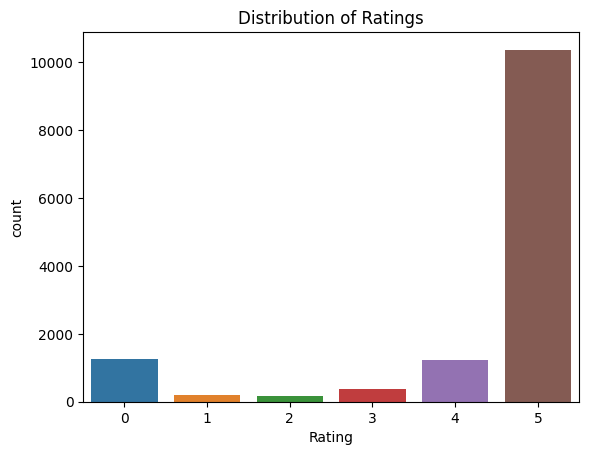

In [21]:
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.show()


# Distribution of Thumbs Up and Thumbs Down Counts:

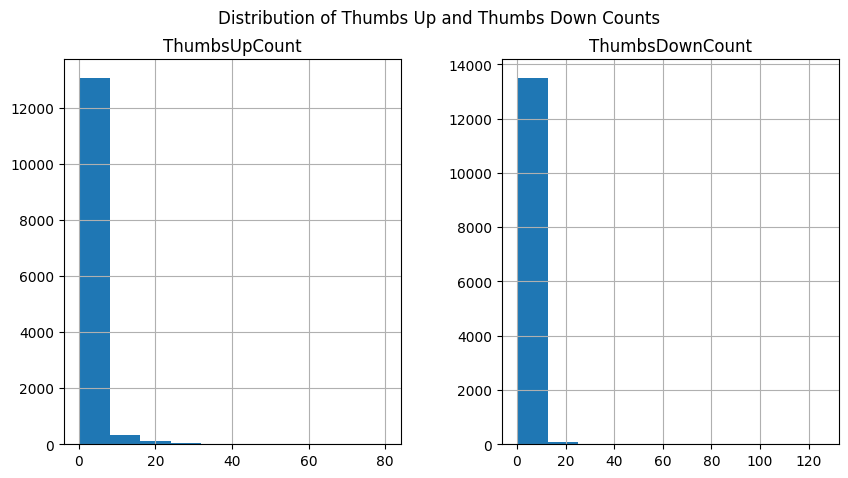

In [22]:
thumbs_counts = df[['ThumbsUpCount', 'ThumbsDownCount']]
thumbs_counts.hist(figsize=(10, 5), bins=10)
plt.suptitle('Distribution of Thumbs Up and Thumbs Down Counts')
plt.show()

<Axes: >

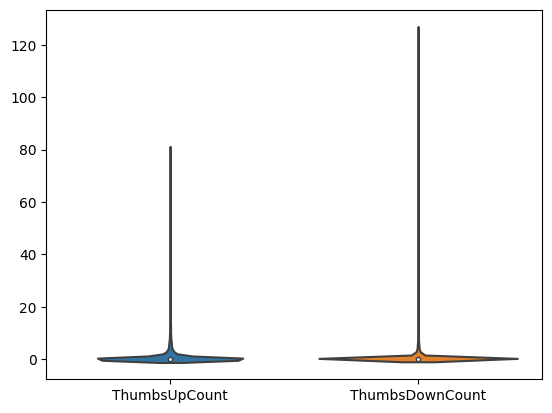

In [23]:
sns.violinplot(thumbs_counts)

In [24]:
X_train["ThumbsUpCount"].max()

80

In [25]:
X_train["ThumbsDownCount"].max()

126

#### Some recipes have received thumbs-up and thumbs-down counts. The maximum number of thumbs-up counts is 80, and the maximum number of thumbs-down counts is 126.

# Top 10 Users by Reputation:


In [26]:
top_users = df.groupby('UserName')['UserReputation'].sum().sort_values(ascending=False).head(10)
print(top_users)

UserName
squeakymouse         1530
Jellybug              570
justmbeth             540
Debglass11            370
Eye                   350
2124arizona           324
grandmascooking22     306
gunslinger            300
sstetzel              270
jeanemed              240
Name: UserReputation, dtype: int64


#### "Squeakymouse" holds the highest reputation among all individuals.

# Correlation Heatmap:

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [28]:
num_data=df[['ID', 'RecipeNumber', 'RecipeCode', 
       'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']]

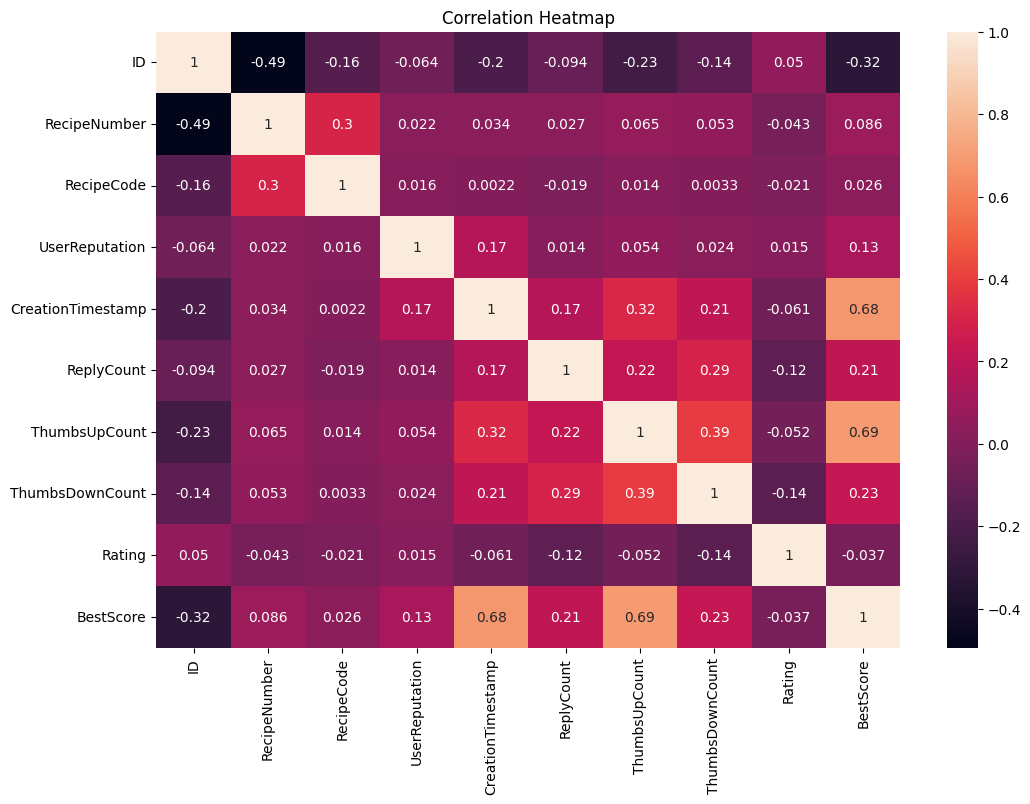

In [29]:
plt.figure(figsize=(12, 8))
correlation_matrix = num_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

#### The correlation between UserReputation and Rating is positive, indicating a direct relationship. However, there is a negative correlation between ThumbsUpCount and Rating, as well as between ThumbsDownCount and Rating and between BestScore and Rating.

# Rating vs User Reputation:


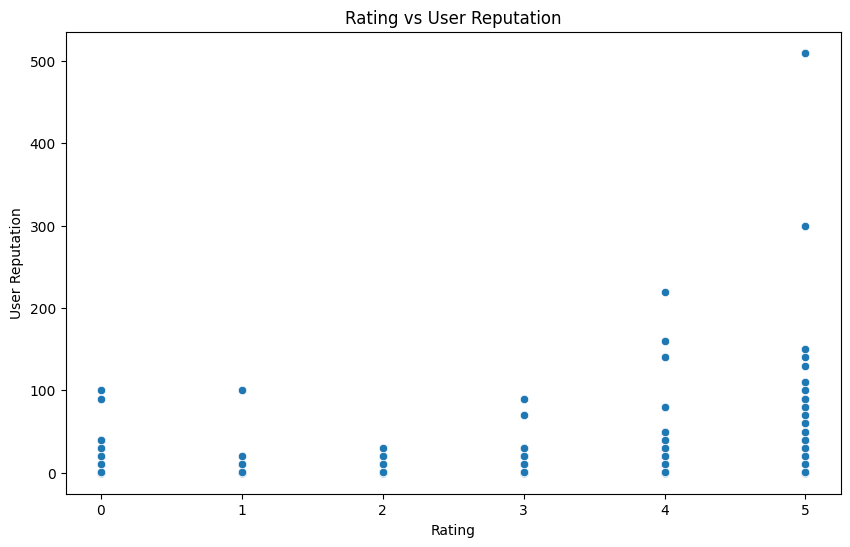

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='UserReputation', data=df)
plt.title('Rating vs User Reputation')
plt.xlabel('Rating')
plt.ylabel('User Reputation')
plt.show()

#### We observed a positive correlation between UserReputation and Rating, indicating a direct relationship. The following graph illustrates this correlation.

# Relationship between Ratings and Thumbs Up/Thumbs Down Counts:



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


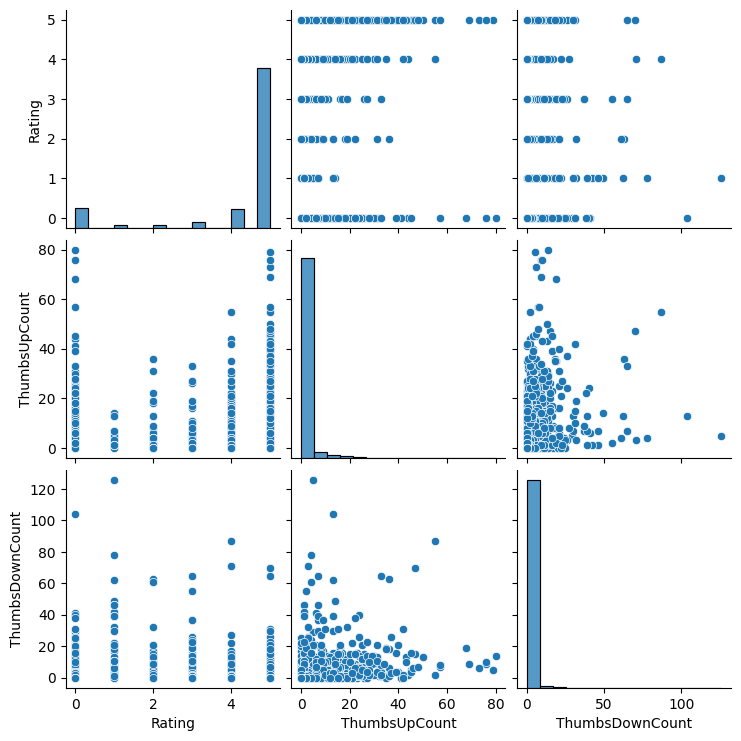

In [31]:
sns.pairplot(df[['Rating', 'ThumbsUpCount', 'ThumbsDownCount']])
plt.show()

# Distribution of Recipe Names:


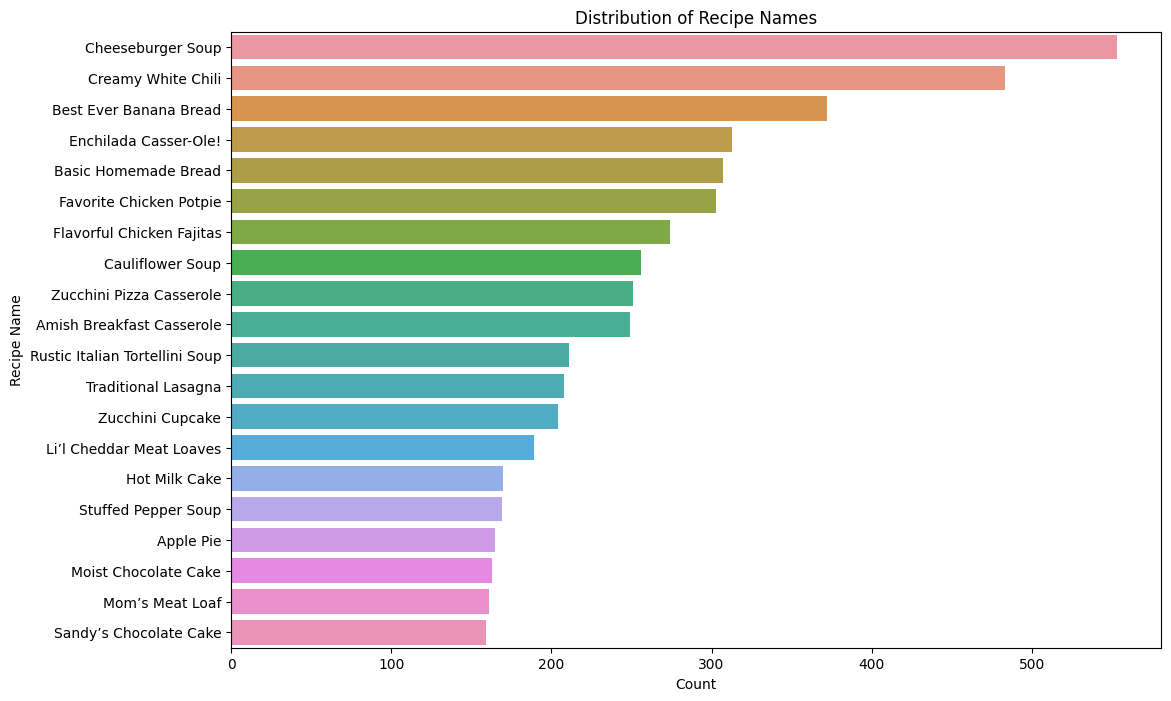

In [32]:
plt.figure(figsize=(12, 8))
sns.countplot(y='RecipeName', data=df, order=df['RecipeName'].value_counts().index[:20])
plt.title('Distribution of Recipe Names')
plt.xlabel('Count')
plt.ylabel('Recipe Name')
plt.show()

# Average Rating by Recipe Name: 

In [33]:
avg_rating_by_recipe = df.groupby('RecipeName')['Rating'].mean().sort_values(ascending=False)
print(avg_rating_by_recipe)

RecipeName
Rustic Italian Tortellini Soup    4.739336
Corn Pudding                      4.692308
Zucchini Pizza Casserole          4.657371
Comforting Chicken Noodle Soup    4.654321
Special Banana Nut Bread          4.648936
                                    ...   
Flavorful Pot Roast               3.774194
Peanut Butter Cup Cheesecake      3.768116
Caramel Heavenlies                3.125000
Fluffy Key Lime Pie               2.740000
Pineapple Orange Cake             2.682759
Name: Rating, Length: 100, dtype: float64


# Distribution of Recipe Ratings Over Time (Creation Timestamp):


In [34]:
import datetime

df['CreationTimestamp'] = pd.to_datetime(df['CreationTimestamp'], unit='s')
df['Year'] = df['CreationTimestamp'].dt.year
df['Month'] = df['CreationTimestamp'].dt.month

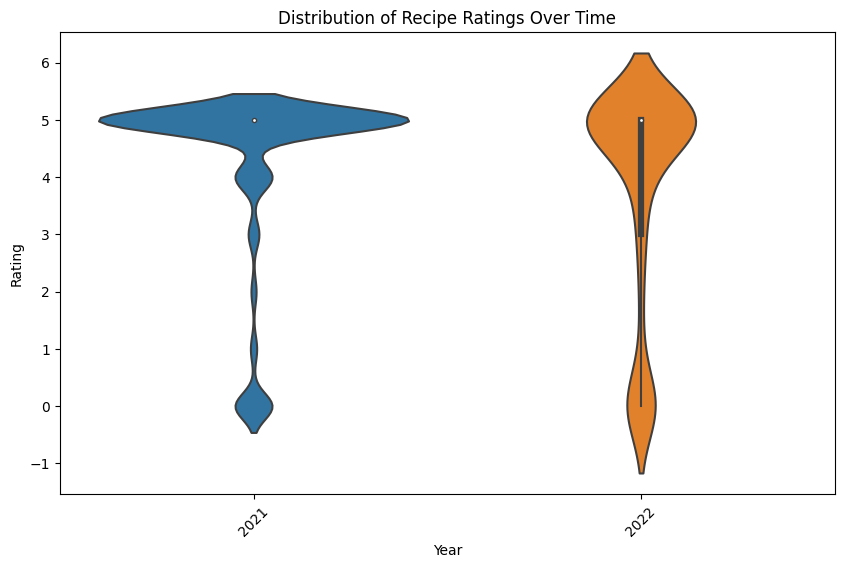

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Year', y='Rating', data=df)
plt.title('Distribution of Recipe Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Top 10 Users by Number of Recipes Reviewed:


In [36]:
top_reviewers = df['UserName'].value_counts().head(10)
print(top_reviewers)

UserName
mjlouk               21
2124arizona          20
No_Time_To_Cook      20
grandmascooking22    19
justmbeth            18
JGa2595176           16
gunslinger           15
angela32             15
s_pants              14
Sue Zappa            14
Name: count, dtype: int64


#### Mjlouk provides the highest number of recipe reviews.

# Length of Recipe Names:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


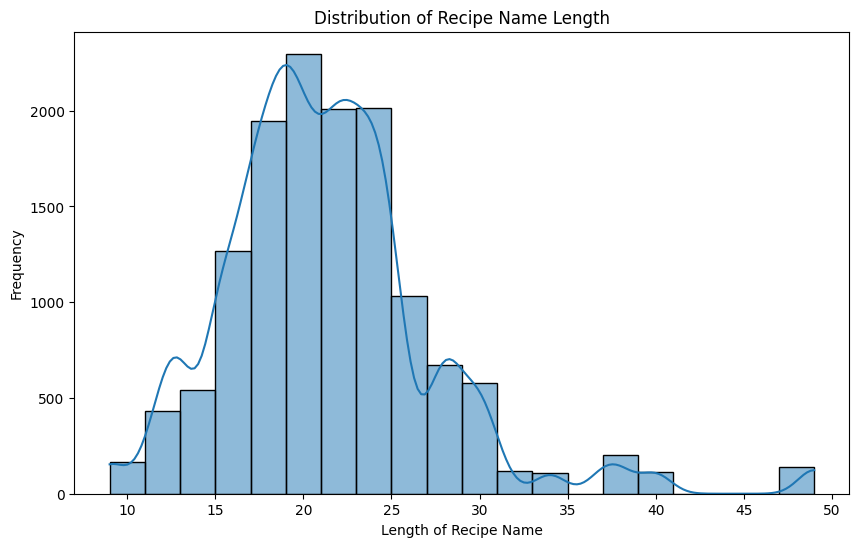

In [37]:
df['RecipeName_Length'] = df['RecipeName'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['RecipeName_Length'], bins=20, kde=True)
plt.xlabel('Length of Recipe Name')
plt.ylabel('Frequency')
plt.title('Distribution of Recipe Name Length')
plt.show()

# Top Recipe Reviewers' Ratings Distribution:



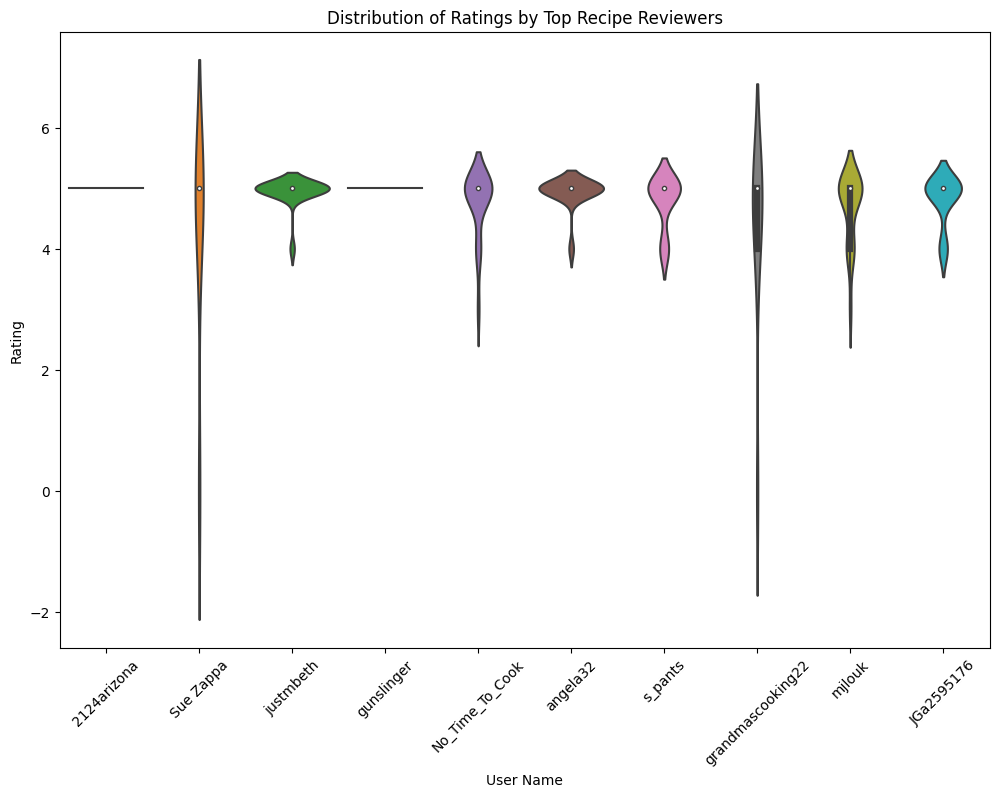

In [38]:
top_reviewers = df['UserName'].value_counts().index[:10]
top_reviewers_ratings = df[df['UserName'].isin(top_reviewers)]
plt.figure(figsize=(12, 8))
sns.violinplot(x='UserName', y='Rating', data=top_reviewers_ratings)
plt.title('Distribution of Ratings by Top Recipe Reviewers')
plt.xlabel('User Name')
plt.ylabel('Rating')
plt.xticks(rotation=45)  
plt.show()

# ** **Preprocessing and Feature Engenearing**

In [39]:
df.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,Year,Month,RecipeName_Length
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,2021-06-03 10:44:38,0,0,0,5,100,great recipe! I have made them just as written...,2021,6,38
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,2021-06-03 10:57:32,0,0,1,5,100,This is an easy and quick recipe that is great...,2021,6,16
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,2021-06-03 10:49:17,0,0,0,3,100,I think I was looking for something extra spec...,2021,6,17
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,2021-06-02 15:48:19,0,0,0,5,100,This is our favorite grilled chicken recipe. ...,2021,6,25
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,2021-06-03 11:04:20,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...,2021,6,16


# Detecting missing data and imputation

In [40]:
df.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
Year                 0
Month                0
RecipeName_Length    0
dtype: int64

#### Recipe_Review  column has Two missing Values.

In [41]:
df['Recipe_Review'] = df['Recipe_Review'].replace({None:"Unknown"})

## Train Test Data Split

In [42]:
X_train = df.drop('Rating', axis=1)
y_train = df['Rating']
X_test=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")

In [43]:
X_train.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
Year                 0
Month                0
RecipeName_Length    0
dtype: int64

In [44]:
X_test.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

#### No missing values for test dataset.

# Text preprocessing function

In [45]:
import re
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove numbers and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    # Remove leading and trailing spaces
    text = text.strip()

    return text



# Apply text preprocessing

In [46]:
X_train['Recipe_Review'] = df['Recipe_Review'].apply(preprocess_text)
X_test['Recipe_Review'] = X_test['Recipe_Review'].apply(preprocess_text)

In [47]:
X_train.shape,y_train.shape,X_test.shape

((13636, 17), (13636,), (4546, 14))

#  After Preprocessing text Column(Recipe_Review) 

In [48]:
X_train['Recipe_Review'][0]

'great recipe have made them just as written wonderfull moist delicate flavorthen the next time did not have sour cream so used vanilla yogurt and added toffee pieces still good have made them as cupcakes and they rise very nicely and stay moist'

In [49]:
X_test['Recipe_Review'][0]

'this was so good the pumpkin was perfect as thickening agent im putting this on my halloween dinner party menu'

# CreationTimestamp to Date Time Format

In [50]:
X_test['CreationTimestamp'] = pd.to_datetime(X_test['CreationTimestamp'], unit='s')
X_test['Year'] = X_test['CreationTimestamp'].dt.year
X_test['Month'] = X_test['CreationTimestamp'].dt.month
X_test['RecipeName_Length'] =X_test['RecipeName'].apply(len)

In [51]:
X_train=X_train.drop("CommentID",axis=1).drop("UserID",axis=1).drop("CreationTimestamp",axis=1)
X_test=X_test.drop("CommentID",axis=1).drop("UserID",axis=1).drop("CreationTimestamp",axis=1)

In [52]:
X_train.shape,y_train.shape,X_test.shape

((13636, 14), (13636,), (4546, 14))

In [53]:
X_train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,UserName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review,Year,Month,RecipeName_Length
0,70,71,12259,Banana Bars with Cream Cheese Frosting,misscoffeepot,20,0,0,0,100,great recipe have made them just as written wo...,2021,6,38
1,72,88,8202,Simple Taco Soup,MichelleMalone,1,0,0,1,100,this is an easy and quick recipe that is great...,2021,6,16
2,458,3,2832,Cheeseburger Soup,jeannem32,1,0,0,0,100,i think was looking for something extra specia...,2021,6,17
3,7,50,100276,Grilled Huli Huli Chicken,ds422,1,0,0,0,100,this is our favorite grilled chicken recipe gr...,2021,6,25
4,60,12,19731,Cauliflower Soup,SusanHoward,1,0,0,0,100,great basic recipe added teaspoons tuscan seas...,2021,6,16


In [54]:
X_test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,UserName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review,Year,Month,RecipeName_Length
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,kalloween,1,0,0,0,100,this was so good the pumpkin was perfect as th...,2021,6,28
1,102,53,3143,Pumpkin Bars,chocolate desert,1,0,0,1,100,so good could not stop eating them so bad good...,2021,6,12
2,156,53,3143,Pumpkin Bars,Vantreesta,1,0,0,0,100,i use small ladle to fill muffin cups,2021,6,12
3,18,89,1324,Porcupine Meatballs,Roberta L.Beauchamp,1,0,4,3,212,i made this and followed the instructions as d...,2021,6,19
4,27,70,32264,Easy Chicken Enchiladas,fhquilting,1,0,0,1,100,very good used corn tortillas used fresh chopp...,2021,6,23


In [55]:
type(X_train),type(X_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

# Create preprocessor for numeric features

In [56]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create Vectorizer for text features

In [57]:
text_transformer = TfidfVectorizer(max_features=1500)

# Create preprocessor for categorical features


In [58]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply Text Vectorizer on Recipe_Review Column

In [59]:
X_train_new=text_transformer.fit_transform(X_train["Recipe_Review"])
X_train_new_df=pd.DataFrame(X_train_new.toarray(),columns=text_transformer.get_feature_names_out())

In [60]:
X_test_new=text_transformer.transform(X_test["Recipe_Review"])
X_test_new_df=pd.DataFrame(X_test_new.toarray(),columns=text_transformer.get_feature_names_out())

In [61]:
#X_train_new_df

In [62]:
#X_test_new_df

# Concatinate Both DataFrame

In [63]:
X_train=pd.concat([X_train,X_train_new_df],axis=1)
X_test=pd.concat([X_test,X_test_new_df],axis=1)

In [64]:
X_train=X_train.drop("Recipe_Review",axis=1)
X_test=X_test.drop("Recipe_Review",axis=1)

In [65]:
X_train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,UserName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,...,yogurt,you,youll,young,your,youre,yr,yum,yummy,zucchini
0,70,71,12259,Banana Bars with Cream Cheese Frosting,misscoffeepot,20,0,0,0,100,...,0.225822,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,72,88,8202,Simple Taco Soup,MichelleMalone,1,0,0,1,100,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,458,3,2832,Cheeseburger Soup,jeannem32,1,0,0,0,100,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,7,50,100276,Grilled Huli Huli Chicken,ds422,1,0,0,0,100,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,60,12,19731,Cauliflower Soup,SusanHoward,1,0,0,0,100,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.231846,0.0,0.0


In [66]:
X_test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,UserName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,...,yogurt,you,youll,young,your,youre,yr,yum,yummy,zucchini
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,kalloween,1,0,0,0,100,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,102,53,3143,Pumpkin Bars,chocolate desert,1,0,0,1,100,...,0.0,0.119195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,156,53,3143,Pumpkin Bars,Vantreesta,1,0,0,0,100,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,89,1324,Porcupine Meatballs,Roberta L.Beauchamp,1,0,4,3,212,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27,70,32264,Easy Chicken Enchiladas,fhquilting,1,0,0,1,100,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Create column transformer to handle numeric and categorical features

In [67]:
categorical_features = ['RecipeName',"Year","Month"]
numeric_features = [ 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore',"RecipeCode","UserReputation","RecipeName_Length"]

In [87]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features) 
    ])

# **1. RandomForestClassifier Model**

##  the final pipeline with the preprocessing steps and model

In [88]:
# pipeline_rf = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

##  hyperparameters

In [89]:
# param_grid_rf = {
#     'classifier__n_estimators': [100,200],
#     'classifier__max_depth': [None,4,8],
#     'classifier__min_samples_split': [2,6,8]
# }

## hyperparameter tuning using GridSearchCV

In [90]:
# grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='accuracy', verbose=2)



## Training the model with hyperparameter tuning

In [ ]:
# grid_search_rf.fit(X_train, y_train)


In [ ]:
# # Best hyperparameters
# print("Best hyperparameters for RandomForestClassifier:", grid_search_rf.best_params_)

# # Making predictions with the best model
# best_model_rf = grid_search_rf.best_estimator_

# y_pred_rf = best_model_rf.predict(X_test)



In [ ]:
# y_pred_rf

In [ ]:
# Rating = 0.771
# 5    4488
# 0      41
# 4      11
# 3       5
# 2       1
# Name: count, dtype: int64

##                             *RandomForestClassifier*

### **Accuracy: 0.771**

### **Insights:**
### * RandomForestClassifier is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.
### * Despite being a powerful algorithm, RandomForestClassifier's performance seems slightly lower compared to the other two models.
### * RandomForestClassifier may suffer from the tendency to overfit the training data, especially if the number of trees (n_estimators) or the depth of trees (max_depth) is not properly tuned.
 

# **2. XGBClassifier**

 ## the final pipeline with the preprocessing steps and model


In [ ]:
# pipeline_xgb = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', XGBClassifier(random_state=42))
# ])


## hyperparameters to tune



In [ ]:
# param_grid_xgb = {
#     'classifier__n_estimators': [50, 100, 150,200],
#     'classifier__max_depth': [None,3, 5, 7],
#     'classifier__learning_rate': [0.1,0.01,0.001]
# }


## hyperparameter tuning using RandomizedSearchCV

In [ ]:
# grid_search_xgb = RandomizedSearchCV(pipeline_xgb, param_grid_xgb,n_iter=2, cv=3, scoring='accuracy', verbose=2)


## Training the model with hyperparameter tuning


In [ ]:
# grid_search_xgb.fit(X_train, y_train)


## Best hyperparameters


In [ ]:
# print("Best hyperparameters for XGBClassifier:", grid_search_xgb.best_params_)

# # Making predictions with the best model
# best_model_xgb = grid_search_xgb.best_estimator_


## Prediction

In [ ]:
# y_pred_xgb = best_model_xgb.predict(X_test)

In [ ]:
# Rating = 0.77562
# 5    4347
# 0      79
# 4      63
# 3      29
# 1      21
# 2       7

## *XGBClassifier (XGBoost)*

### **Accuracy: 0.7756**

### **Insights:**
### * XGBoost is an implementation of gradient boosting algorithms, known for its speed and performance.
### * XGBClassifier tends to perform well in various types of datasets and is less prone to overfitting compared to RandomForestClassifier.
### * Although XGBoost generally performs well, the accuracy achieved in this experiment is only slightly better than RandomForestClassifier. This could indicate that the dataset may not fully exploit the strengths of XGBoost or that hyperparameters were not optimized effectively.


# **3. LGBMClassifier**

## the final pipeline with the preprocessing steps and model

In [ ]:
pipeline_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=20))
])


## hyperparameters to tune


In [ ]:
param_grid_lgbm = {
    'classifier__n_estimators': [300],
    'classifier__max_depth': [None],
    'classifier__learning_rate': [0.1],
}


## Performing hyperparameter tuning using GridSearchCV


In [ ]:
grid_search_lgbm = GridSearchCV(pipeline_lgbm, param_grid_lgbm, cv=5, scoring='accuracy', verbose=2)

## Training the model with hyperparameter tuning

In [ ]:
grid_search_lgbm.fit(X_train, y_train)

## Best hyperparameters

In [ ]:
print("Best hyperparameters for LGBMClassifier:", grid_search_lgbm.best_params_)


## Making predictions with the best model

In [ ]:
best_model_lgbm = grid_search_lgbm.best_estimator_


## Prediction

In [ ]:
y_pred_lgbm = best_model_lgbm.predict(X_test)

## submission

In [ ]:
submission = pd.DataFrame(columns = ["ID","Rating"])
submission["ID"] = [i for i in range(1,len(y_pred_lgbm)+1)]
submission["Rating"] =y_pred_lgbm
submission.to_csv('submission.csv',index=False)

submission

In [ ]:
submission["Rating"].value_counts()

In [ ]:
# Rating =0.7875,cv=5
# 5    4168
# 0     155
# 4     135
# 3      53
# 1      28
# 2       7

## *LGBMClassifier (LightGBM)*

### **Accuracy: 0.7875**

### **Insights:**
### * LightGBM is another gradient boosting framework that is designed for distributed and efficient training of large datasets.
### * LGBMClassifier often provides faster training speed and lower memory usage compared to XGBoost, making it suitable for large-scale datasets.
### * The highest accuracy achieved by LGBMClassifier suggests that it may be better suited for this dataset compared to the other two models.
### * The improved performance of LGBMClassifier could be attributed to its ability to handle categorical features more efficiently and effectively, as well as its flexibility in handling unbalanced datasets.

# Accuracy Comparison of Different Models

In [ ]:
models = ['RandomForest', 'XGBoost', 'LightGBM']
accuracy_scores = [0.771, 0.775, 0.7875]

# Plotting

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0.7, 0.8)  
plt.show()

#    Overall, while all three models performed reasonably well, LGBMClassifier outperformed the others slightly in terms of accuracy. This indicates that LGBMClassifier may be the most suitable choice for this particular dataset, possibly due to its efficiency in handling categorical features and text features and its ability to generalize well to unseen data.  

# Evaluate models & Plotting confusion matrix by splitting the dataset
